In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_IND = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

In [5]:
df_DA_IND['job_posted_month_no'] = df_DA_IND['job_posted_date'].dt.month

In [7]:
df_DA_IND_explode = df_DA_IND.explode('job_skills')

In [9]:
df_DA_IND_pivot = df_DA_IND_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

In [11]:
df_DA_IND_pivot.loc['Total'] = df_DA_IND_pivot.sum()

In [13]:
df_DA_IND_pivot = df_DA_IND_pivot[df_DA_IND_pivot.loc['Total'].sort_values(ascending=False).index]

In [15]:
df_DA_IND_pivot = df_DA_IND_pivot.drop('Total')

In [16]:
df_DA_IND_pivot

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,sqlite,suse,swift,tidyr,unify,vb.net,watson,webex,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,75,55,51,41,26,36,23,6,5,11,...,0,0,0,0,0,0,0,0,1,0
2,64,40,46,32,24,14,23,6,7,8,...,0,0,0,0,0,0,0,1,0,0
3,57,25,32,30,19,10,9,7,6,3,...,0,0,1,1,0,0,0,0,0,0
4,56,35,35,27,23,24,16,4,8,7,...,1,0,0,0,0,0,0,0,0,0
5,44,25,37,24,18,10,9,4,9,3,...,0,0,0,0,0,0,0,0,0,0
6,50,42,34,29,23,28,23,10,9,5,...,0,0,0,0,0,0,0,0,0,0
7,57,37,37,38,20,20,23,5,8,5,...,0,0,0,0,1,0,0,0,0,0
8,88,58,54,47,43,24,28,20,11,7,...,0,0,0,0,0,0,0,0,0,0
9,96,65,59,53,43,26,27,12,5,14,...,0,0,0,0,0,1,0,0,0,0


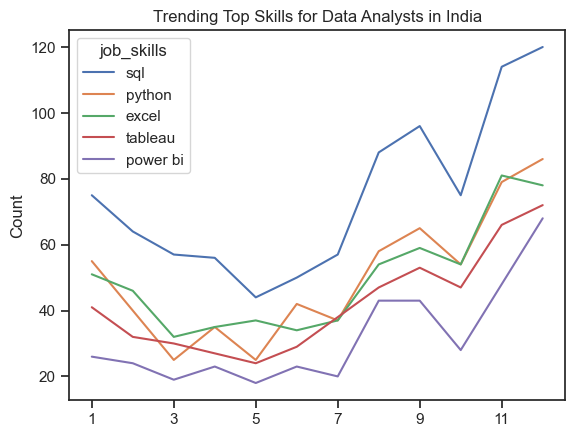

In [22]:
df_DA_IND_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in India')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [19]:
# Get monthly totals
DA_totals = df_DA_IND.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     144
2     118
3      97
4      99
5      64
6      93
7      92
8     141
9     166
10    126
11    204
12    195
dtype: int64

In [ ]:
df_DA_IND_percent = df_DA_IND_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_IND_percent = df_DA_US_percent.reset_index()
df_DA_IND_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_IND_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_IND_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent